<font color = cyan> <font size = 6> Importing Libraries

In [1]:
# Sequential API to create Models
from keras.models import Sequential

# Components to create a Model
from keras.layers import Dense, Input

# Stochastic Gradient Descent Algorithm
from keras.optimizers import SGD, Adadelta, Adam

# Keras already hosted MNIST dataset for us
from keras.datasets import mnist

# We don't need "to_categorical" in the Autoencoder.

# A Keras utility to visualize Model graph
from keras.utils import plot_model

# Another ML library that has many utilities for image operation
import skimage

# Here we will use only two of it's utilities
from skimage.io import imshow # To display images

# Another Python library for plotting things
import matplotlib.pyplot as plt

# Another Python library to manipulate vectors, metrices, arrays etc.
import numpy as np

<font size = 6><font color = red> Hyper-<font color = yellow>Parameters

In [2]:
# Hyperparameters are those parameters which we can choose or select by our choice!

# whole dataset splits into batches
batch_size = 128 # Each batch will have 128 samples each!

# We don't need number of class here. Why? We'll understand later.

# Number of times we want to train the Model
nb_epoch = 100 # epoch ---> how many times we want to Train our Model before Testing!

<font size = 6><font color = lime> Load Data

In [3]:
# Load MNIST dataset
# Data split into two sub-set: Traing and Test
(X_train, _), (X_test, _) = mnist.load_data() # No needs for labels. We don't need the associated labels (with image) for solving autoencoder problem. Underscore "_" is a valid identifier in Python. We have store the labels in "_" because we won't be using them later.
                                              # Now we can understand why we drop "to_categorical" during Library import. Beacause "to_categorical" is used to Binarize the labels!
# We didn't define any value for splitting (like 80%, 20%). It is done by default.

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


<font size = 6><font color = red> Data Statistics

In [4]:
print("Number of Training Samples : ", len(X_train))

Number of Training Samples :  60000


In [5]:
print("Shape of Training Data : ", X_train.shape)

Shape of Training Data :  (60000, 28, 28)


In [6]:
print("Data type of Training samples : ", X_train.dtype)

Data type of Training samples :  uint8


In [7]:
print("Number of Test Samples : ", len(X_test))

Number of Test Samples :  10000


In [8]:
print("Shape of Test Data : ", X_test.shape)

Shape of Test Data :  (10000, 28, 28)


In [9]:
print("Data type of Test samples : ", X_test.dtype)

Data type of Test samples :  uint8


<font size = 6><font color = lime> Visualize Data

In [10]:
# A single sample among 60,000 samples
X_train[0].shape

(28, 28)

In [11]:
a_random_sample = X_train[0]

# Pixel values of the sample
a_random_sample

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

/tmp/ipython-input-2182570965.py:5: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(random_image)


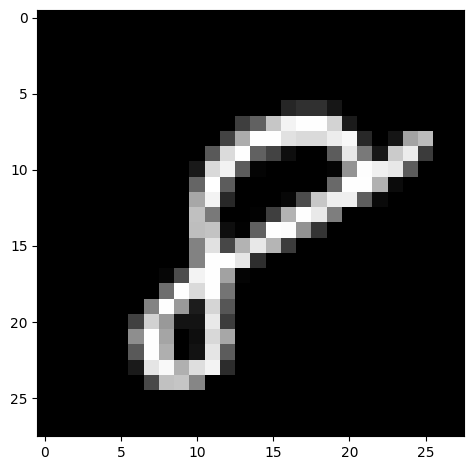

In [12]:
# Get a random sample
random_image = X_train[59999]

# Display it
imshow(random_image)

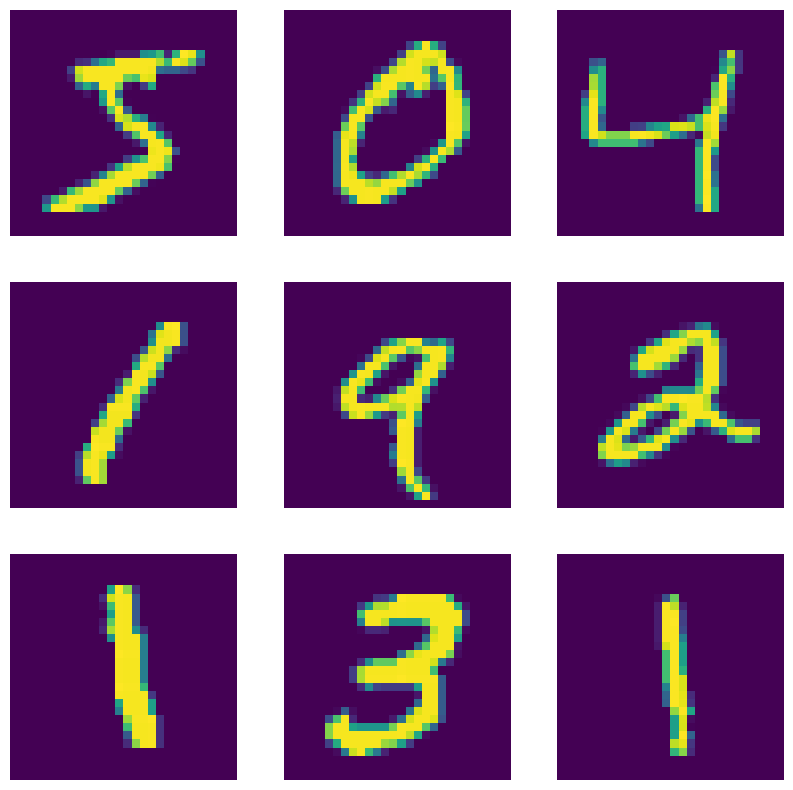

In [13]:
# To plot multiple images ---

# Define the size of the figure
plt.figure(figsize=(10,10))

for i in range(9):
  ax = plt.subplot(3, 3, i+1)

  # Get a sample at index i
  an_image = X_train[i]

  # Display the sample
  plt.imshow(an_image)

  # Display the label of the sample as title
  # plt.title(int(y_train[i])) # We don't need labels for solving Autoencoder.

  plt.axis("off")

<font size = 6><font color = red> Reshape and Flatten Data

<font size = 5><font color = yellow> We have to Reshape and Flatten Data here. Because we are implementing the Autoencoder with Feedforward Neural Network (FNN) in this problem.

In [14]:
print("Shape of Training Data : ", X_train.shape)

print("Shape of a Training Sample : ", X_train[0].shape)

Shape of Training Data :  (60000, 28, 28)
Shape of a Training Sample :  (28, 28)


In [15]:
# Get a sample image
an_image = X_train[0]

print("Shape of a Sample image : ", an_image.shape)

# Define new Shape and Flatten the image
new_shape = 28*28   # 28*28 = 784. new_shape = 784.

flattend_an_image = an_image.reshape(new_shape,) # reshape is a function of numpy library. Because we have only 1 image we didn't need to mension the image numbers.
print("Shape of the Flattend image : ", flattend_an_image.shape) # In reality, when we Flatten a 2D image to 1D then it is no longer an image. It becomes a 1D Tensor.

Shape of a Sample image :  (28, 28)
Shape of the Flattend image :  (784,)


In [16]:
print("Previous Shape of X_train : ", X_train.shape)

# Flatten the whole Training Data
X_train = X_train.reshape(60000, 784) # in reshape function pass the number of image (samples), here it is 60000. Then the reshape value, here it is 784.
                                      # After performing reshape operation, the the X_train data are not in image(2D) form. Now they are in 1D form (for now).
print("New Shape of X_train : ", X_train.shape)

Previous Shape of X_train :  (60000, 28, 28)
New Shape of X_train :  (60000, 784)


In [17]:
print("Previous Shape of X_test : ", X_test.shape)

# Flatten the whole Test Data
X_test = X_test.reshape(10000, 784)

print("New Shape of X_test : ", X_test.shape)

Previous Shape of X_test :  (10000, 28, 28)
New Shape of X_test :  (10000, 784)


In [18]:
print("Previous Data type of Training samples : ", X_train.dtype)
print("Previous Data type of Testing samples : ", X_test.dtype)

# Change data type of train and test data
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

print("New Data type of Training samples : ", X_train.dtype)
print("New Data type of Testing samples : ", X_test.dtype)

Previous Data type of Training samples :  uint8
Previous Data type of Testing samples :  uint8
New Data type of Training samples :  float32
New Data type of Testing samples :  float32


<font size = 6><font color = red> Rescaling Data <font color = cyan> (Every time we work with FNN/CNN, we must Rescale input)

<font color = yellow> Before doing Rescalling, we must change the DataType. Datatype change is done in the previous code cell. Rescaling means converting all the values between 0 and 1.

In [19]:
# Get a random sample
a_sample = X_train[0]      # To do Rescaling, first find out the range (min value and max value).

print("Min value of sample before Rescaling : ", a_sample.min()) # we used min() and max() functions of numpy.
print("Max value of sample before Rescaling : ", a_sample.max())

Min value of sample before Rescaling :  0.0
Max value of sample before Rescaling :  255.0


In [20]:
# Divide each value in Train and Test data by 255
X_train /= 255
X_test /= 255  # Divide by the maximum value to convert range between 0 and 1. This is the Rescaling!

In [21]:
# Now let's see the new Rescale value's min and max values!
a_sample = X_train[0]

print("Min value of sample after Rescaling : ", a_sample.min()) # we used min() and max() functions of numpy.
print("Max value of sample after Rescaling : ", a_sample.max()) # Verifying the new Rescale values.

Min value of sample after Rescaling :  0.0
Max value of sample after Rescaling :  1.0


<font size = 6><font color = red> Create Noisy Train Data

<font size = 4><font color = yellow> From beginning, we took the training data but not training label. Same for test data. We just took the test data and not the test labels. Why we did that? When we will train, won't we need the label? <br/> We need at least one of those labels. Since we are implementing supervised learning, we need input and at least one other info(labels).<font color = red> Since we did not take the labels here, So now we have to create a new label of our own.<font color = yellow> Why we have to create a new label? Because here we are implementing Autoencoder on the problem of cleaning noisy image. So now we will see if we give input of a noisy image in autoencoder how it learn a latent space or latent representation. After learning we will provide test data and see it will give us a clean image from a noisy image! Noise contains many districtions or insensitive features. Noise are the insensitive features. And the pattern inside the noise (indicating digit here) is the sensitive input. Our Autoencoder through traning, will learn to detect  the sensitive pattern or sensitive pixels or sensitive input. And it will reconstruct the same input. Now lt's see how it happens.

<font size = 4><font color = cyan> Do we have noisy data? No, we don't have the noisy data. This dataset of our from Keras is a cleaned dataset. So, now first we have to create a noisy image! Let's see the ways to create a noisy image.

/tmp/ipython-input-888843735.py:7: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(an_image) # During display of an image using imshow function, it checks image's dimension. If dimensions are not 2D/3D it gives error! So we can not pass the sample directly to imshow. [To bypass it] we have to reshape it first!


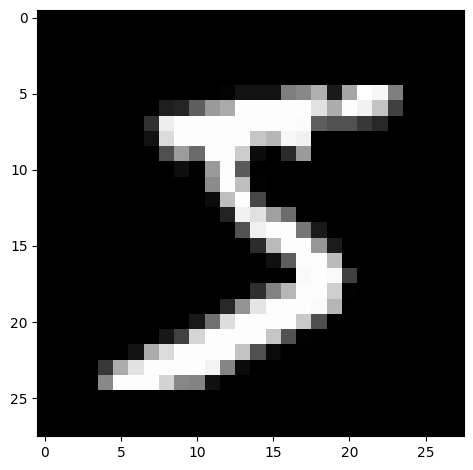

In [22]:
# Get a Train image from X_train
a_sample = X_train[0]

# Reshape it to 2D
an_image = a_sample.reshape(28,28) # Prevoiusly we had flattened the X_train. So, if we print it (784) now it won't come the size of 28*28. That's why we have to reshape it to 2D.

imshow(an_image) # During display of an image using imshow function, it checks image's dimension. If dimensions are not 2D/3D it gives error! So we can not pass the sample directly to imshow. [To bypass it] we have to reshape it first!

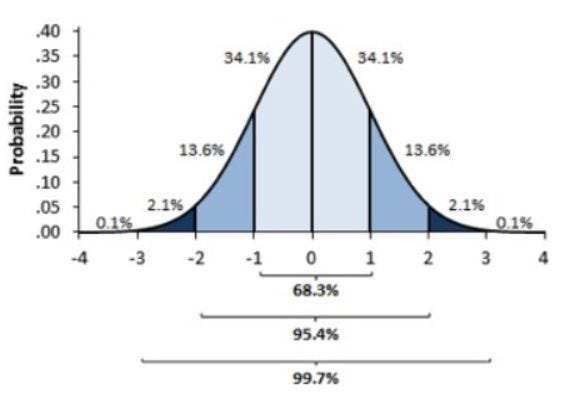

<font size = 4><font color = blue> Fig : Bell shaped Curve

<font size = 4><font color = yellow> Bell shape curve or Normal distribution we call it. This curve's mean is 0. Why we are showing this we will understand it in the upcoming cells.

<font size = 6><font color = cyan> An example of corrupting a sample image

/tmp/ipython-input-3747682689.py:10: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(random_array)


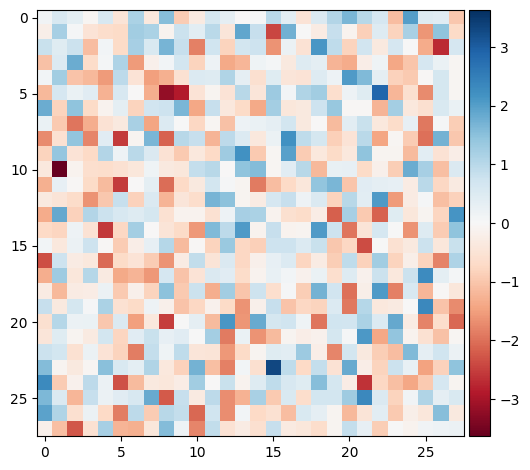

In [23]:
# Level of corruption
corruption_level = 0.3 # This means we want to corrupt our image 30%. Technically an image is a grid of pixels. There are many pixels. We will corrupt the pixels.
                       # If we corrupt then the pixel colors will be changed and we will see the image noisy. And won't recognise the image properly.

# Create an array of random values that has the identical shape of the image we want to corrupt
random_array = np.random.normal(loc=0.0, scale=1.0, size=(28,28)) # This function draws random sample(values) from normal distribution and create the array. The parameter loc=0.0 indicates 'mean'. We are creating the array with the help of a normal distribution and that ND's mean must be 0.
                                                                  # And the scale of the normal distribution must be 1. Scale means Standard Deviation. And the output array it'll return should have size = 28*28. This array has no Meaning. No specific patterns. Just a ramdom image. Though we see the image as a color image but it is not.
                                                                  # It is a gray-scale image. Because of the function imshow's property it is showing like a color image.

imshow(random_array)

/tmp/ipython-input-1787334431.py:7: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(random_array)


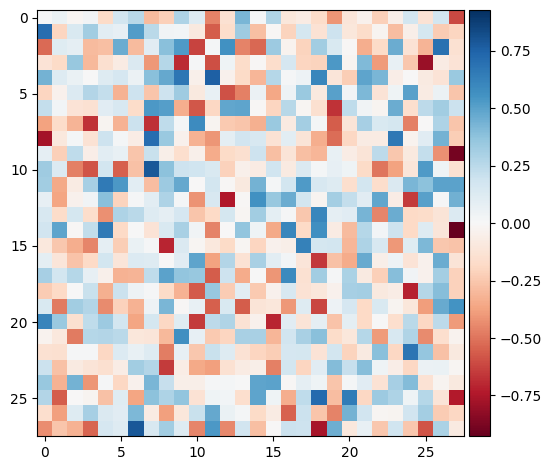

In [24]:
# Level of corruption
corruption_level = 0.3

# Create an array of random values that has the identical shape of the image we want to corrupt
random_array = corruption_level * np.random.normal(loc=0.0, scale=1.0, size=(28,28))  # Here multiplied with our corruption level. The new pixels looks dimmed.

imshow(random_array)

<font size = 5><font color = cyan> Now we have to super-impose the noise upon the original image.

/tmp/ipython-input-1300580826.py:4: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(corrupted_image)


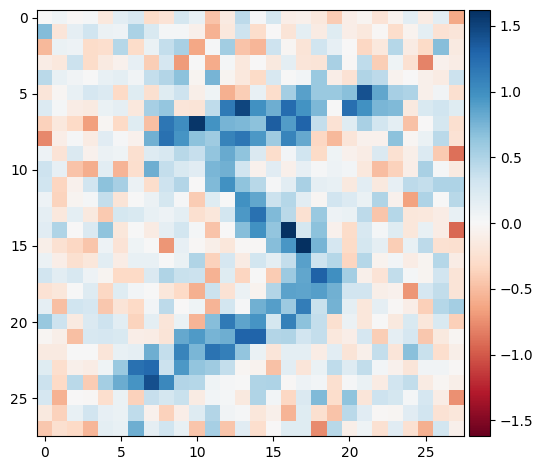

In [25]:
# Somewhat noisy image
corrupted_image = an_image + random_array # Add the noise with original image

imshow(corrupted_image)

<font size = 6><font color = red> Add random noise to Train and Test data

In [26]:
# Adding random noise to the Training dataset
X_train_noisy = X_train + corruption_level * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape) # 60000 noisy image from 60000 cleaned image.
                                                                                                      # In Autoencoder, we will give it noisy image as input and it will give us a cleaned image as output.
# Adding random noise to the Test dataset
X_test_noisy = X_test + corruption_level * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)    # 10000 noisy image from 10000 cleaned image.

### In prevoius FNN/CNN implementation, we were predicting the label of the input. That's why we had to provide both image and it's label. But here we don't need the labels because we are just simply de-noising the image. This is the function of Autoencoder, to denoise the input! That's why in Autoencoder we will give the noisy image as input. And as a label, we have to provide the cleaned image of the noisy image as label. Then it will find the relation between them and learn from them and make relations among them.

<font size = 6><font color = red> Clip Noisy Data

<font size = 5><font color = yellow>What is Clip Noisy Data? We have seen in the previous models that before fitting the model (model.fit), we had to do a operation called Rescaling! The aim of that operation was to convert our pixel values between 0 to 1. We have Rescale the original data which will act as labels for this Autoencoder model. But, We will provide the noisy image data as input in the Autoencoder! So now, we have to Rescale(Clip) these Noisy images! To do so first, let's check the noisy image's Min value and Max value.

In [27]:
# Min value
X_train_noisy.min()

np.float64(-1.6248165889853288)

In [28]:
# Max value
X_train_noisy.max()

np.float64(2.5098990274924473)

<font size = 5><font color = yellow> Previously we had integer min/max values. Between 0 to 255. So, we divided by 255 to Convert pixel values between 0 to 1. But here in the case of Noisy images, we got the min value a negative number with several decimal number after it (a floating point number). And we got a positive max value with several decimal numbers after it (a floating point number). So in this case we can not divide all these numbers with a specific value (integer number) to convert them between 0 to 1! That's Why, in this case, Rescaling is NOT POSSIBLE! We can do the work by CLIPPING the value!

In [29]:
x_train_noisy = np.clip(X_train_noisy, 0., 1.) # '0.' is the minimum value for clipping (set by us. it could be any value). '1.' is the maximum value for clipping.
x_test_noisy = np.clip(X_test_noisy, 0., 1.)   # Numpy's clip function will clip the values(of the array we've given {X_test_noisy}) within the minimum and maximum range we have provided.\
                                               # How the Numpy's Clip work? It will traverse the array. Check if the values are less than the minimum value set by user. If the value is less then it replaces the value with the minimum value.
                                               # Same process goes for the maximum value. It will traverse the array. Check if the values are greater than the maximum value set by user. If the value is greater then it replaces the value with the maximum value.

In [30]:
print(x_train_noisy.min(), x_train_noisy.max()) # Check the min and max values of the noisy images after performing Clipping operation. We can see the new min and max values are between 0 to 1. Meaning all values are now converted (clipped) to 0 and 1.

0.0 1.0


In [31]:
print(x_train_noisy.shape)
print(x_test_noisy.shape)

(60000, 784)
(10000, 784)


<font size = 6><font color = red> Define Model

In [32]:
# Multilayer Perceptron Model

# We want to create a sequentially stacked model using Keras Sequential API
model = Sequential()

# Set up input layer
model.add(Input(shape=(784,)))

# 1st layer in the Model to receive inputs
model.add(Dense(784, activation='relu'))

# Hidden layer
model.add(Dense(500, activation='relu'))  # We have to keep the number of neurons less than input/output layer in the latent/hidden layer to extract the core feature(representaion).

# Output layer
model.add(Dense(784, activation='sigmoid')) # Because Autoencoder gives same output, just de-noise the input. That's why the number of nuron in the output layer is same as input layer(784 neurons).
                                            # Here the output layer activation function is 'sigmoid'. Previously we used 'softmax'. Softmax is used for multi-class classification. We used 'sigmoid' because here we are not doing any multi-class classification.
# If we recall the Reconstruction loss, it gives us difference between our original image and predicted output. In Autoencoder our input is noisy data and output is cleaned data. We can consider this thing as a binary classification or binary data.
# And when we do binary classification we have to give 'sigmoid' as activation function. if sigmoid value is around 0 means the reconstruction was not good. If sigmoid value is around 1 then it menas the reconstruction was 100%.

<font color = red><font size = 6> Compile Model

In [33]:
# Choose learning rate
learning_rate = 0.001 # Normally this is the standard value of learning rate.

# Select Optimizer
optimizer = Adam(learning_rate=learning_rate) # Stochastic Gradient Dissent (SGD) is not the only optimizer. There are many better optimizer than SGD. Adam optimizer is one of those better optimizer. In previous models, we used SGD.

# Select Loss function
loss = 'binary_crossentropy'  # loss function or cost function. It is the Norm or Standard practice to take 'binary_crossentropy' as loss function for binary-class classification.

# Select Evaluation matrics
metrics = ['accuracy']      # In our Autoencoder problem, we want to minimize our Reconstruction Loss. Here our main focus is on the LOSS function. We want to minimize our loss.
                            # Here the metrics don't have rally any work though metrics is mentioned here. 'accuracy' is not the main focus here! We want to learn better representation of the input in the output and genereate the label.

# Model Compilation
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

<font color = red><font size = 6> Visualize Model

In [34]:
# A Summary of Inputs, Outputs in each layer
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 784)            │       615,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 500)            │       392,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 784)            │       392,784 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,400,724 (5.34 MB)

 Trainable params: 1,400,724 (5.34 MB)

 Non-trainable params: 0 (0.00 B)

<font color = Lime><font size = 6>Calculate Parameters of every layer: <br/> <font color = red><font size = 5> Formula : inputs * outputs + bias <br/>
<font color = orange><font size = 5> Params in 1st layer : <br/> <font size = 4>
inputs = 784 <br/>
outputs = 784 <br/>
bias = 784 <br/>
Total Params = 784 * 784 + 784 = 615,440 <br/>
<font color = blue><font size = 5> Params in hidden layer : <br/> <font size = 4>
inputs = 784 <br/>
outputs = 500 <br/>
bias = 500 <br/>
Total Params = 784 * 500 + 500 = 392,500 <br/>
<font color = cyan><font size = 5> Params in output layer : <br/> <font size = 4>
inputs = 500 <br/>
outputs = 784 <br/>
bias = 784 <br/>
Total Params = 500 * 784 + 784 = 392,784 <br/>
<font color = red><font size = 5>
Total Trainable Params = 615,440 + 392,500 + 392,784 = 1,400,724

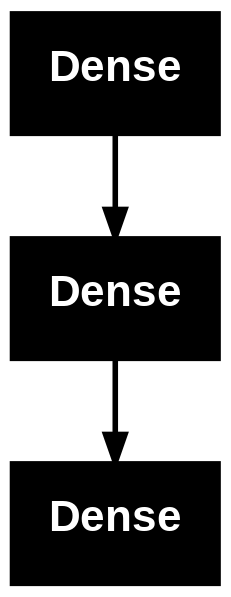

In [35]:
plot_model(model)

<font color = lime><font size = 6> Model Training

In [36]:
# Train  # nb_epoch was 100. Means we want to train it 100 times.
history = model.fit(x_train_noisy, X_train, epochs=nb_epoch, batch_size=batch_size) # x_train_noisy are the noisy input images and X_train are the corresponding clean image working as a label. epochs=nb_epoch and  batch_size=batch_size are defined at the beginning.

Epoch 1/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.0098 - loss: 0.2038
Epoch 2/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.0125 - loss: 0.0959
Epoch 3/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.0125 - loss: 0.0889
Epoch 4/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.0150 - loss: 0.0861
Epoch 5/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.0145 - loss: 0.0845
Epoch 6/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.0142 - loss: 0.0834
Epoch 7/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.0153 - loss: 0.0825
Epoch 8/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.0157 - loss: 0.0818
Epoch 9/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.0156 - loss: 0.0814
Epoch 10/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.0152 - loss: 0.0808
Epoch 11/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.0151 - loss: 0.0805
Epoch 12/100
469/469 ━

<font color = Lime><font size = 6> Inference on Test Data

In [37]:
# Evaluate
evaluation = model.evaluate(x_test_noisy, X_test)

# Display Test statistics
print("Summary : Loss over the Test Dataset : %.2f, Accuracy : %.2f" % (evaluation[0]*100, evaluation[1]*100))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0192 - loss: 0.0854
Summary : Loss over the Test Dataset : 8.58, Accuracy : 1.83


<font color = Lime><font size = 6> Prediction

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


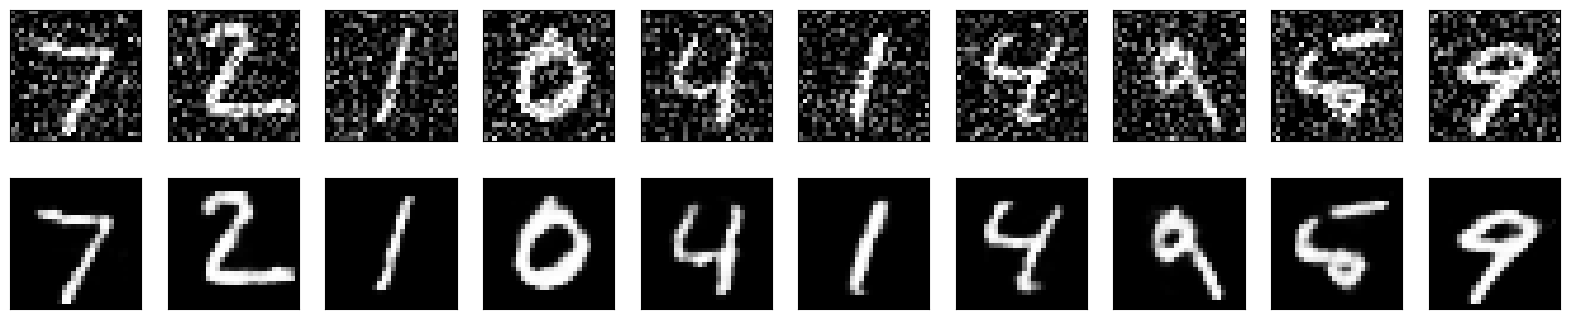

In [38]:
# Decode Test images
reconstructed_imgs = model.predict(x_test_noisy)

n = 10 # how many digits we will display

plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i+1)
  plt.imshow(x_test_noisy[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i+1+n)
  plt.imshow(reconstructed_imgs[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

### As said before, 'accuracy is not the concern or main focus here. We want to minimize the 'loss' as low as possible. Training an Autoencoder is very difficult. Specifically training with FNN. Autoencoder with FNN is very basic and simple Autoencoder. To get expected result, accuracy, and loss is very hard with this autoencoder. Getting a satisfactory output also does not ensure that this Autoencoder model has learned well. It may have been overfitted. Because from the output of 1st layer's 10 images, we can see though the images are noisy but the number pixels here are dominant. That can cause Overfitting! Say for 0 or 9. There are other Autoencoders like Sparse Autoencoder, Variational Autoencoders (VAEs). Even Autoencoder can be implemented with CNN also. So, that was our discussion with Autoencoder for now.

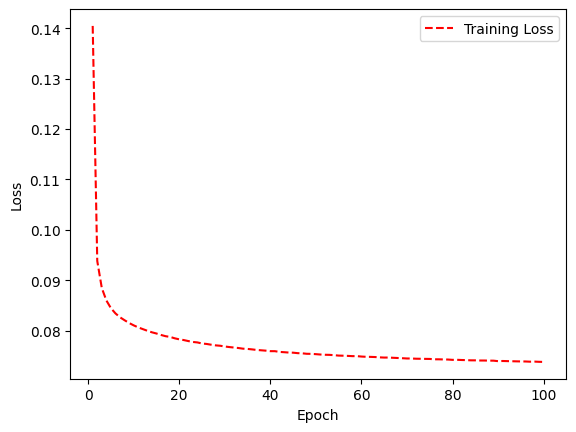

In [39]:
# Get Training Loss histories
training_loss = history.history['loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize Loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.legend(['Training Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

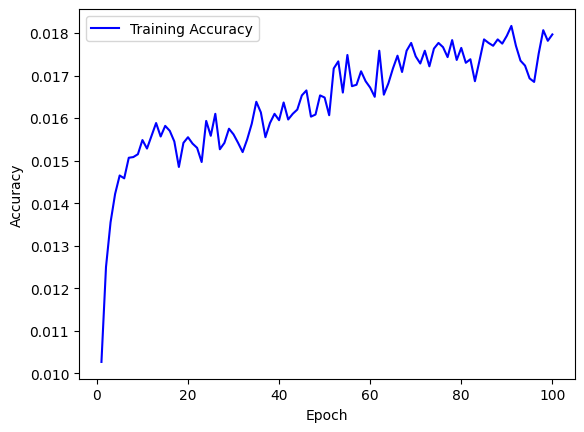

In [40]:
# Get Training Accuracy histories
training_accuracy = history.history['accuracy']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize Accuracy history
plt.plot(epoch_count, training_accuracy, 'b-')
plt.legend(['Training Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()